# Graph Based Spin Lattice

### Find lowest ground state of simple Ising Hamiltonian
For a graph, $G = (E,V)$, defined by a set of edges, $E$, and vertices, $V$, we want to represent an Ising model, where the edge weights, $w_{ij}$ are given by the spin interactions, i.e., $w_{ij} = J_{ij}$.

Given a configuration of spins (e.g., $\uparrow\downarrow\downarrow\uparrow\downarrow$) we can define the energy using what is referred to as an Ising Hamiltonian:
$$ \hat{H} = \sum_{(i,j)\in E}J_{ij} s_is_j$$
where, $s_i=1$ if the $i^{th}$ spin is `up` and $s_i=-1$ if it is `down`, and the sumation runs over all edges in the graph. 


In [1]:
# Load relevant libraries. If you have errors you probably need to install them into your conda env

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
import scipy
random.seed(2)

### Create a graph that defines the Ising interactions

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


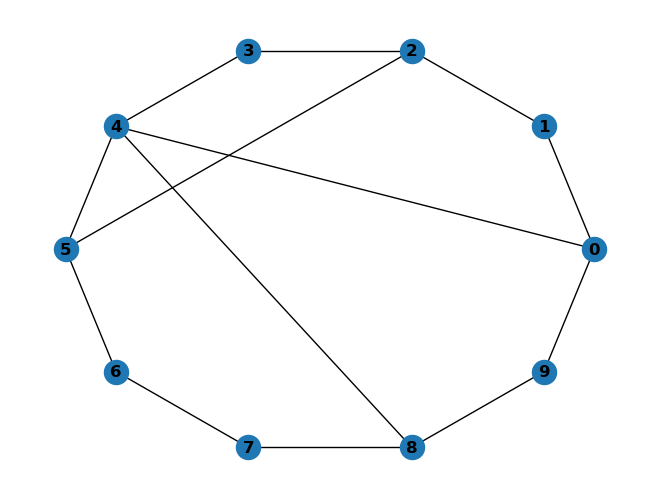

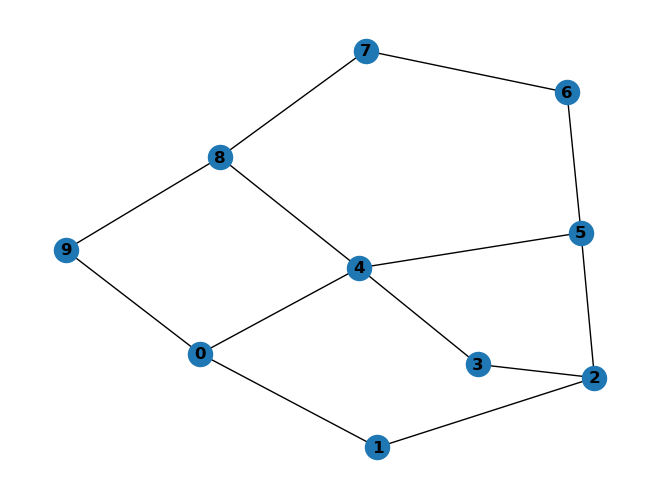

In [2]:
G = nx.Graph()
G.add_nodes_from([i for i in range(10)])
G.add_edges_from([(i,(i+1)% G.number_of_nodes() ) for i in range(10)])
G.add_edge(2,5)
G.add_edge(4,8)
G.add_edge(4,0)
for e in G.edges:
    G.edges[e]['weight'] = 1.0
    print(G.edges[e]['weight'])

# Now Draw the graph. First we will draw it with the nodes arranged on the circle, then we will draw the same graph 
# with the position of the nodes optimized for easier visualization
plt.figure(1)
nx.draw(G, with_labels=True, font_weight='bold', pos=nx.circular_layout(G))
plt.figure(2)
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()



array([[0., 1., 0., 0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

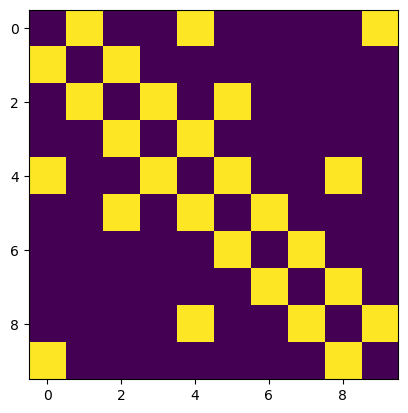

In [3]:
A = nx.adjacency_matrix(G).todense()
display(A)
plt.imshow(A);

### Add your BitString class below

In [4]:

class BitString:
    """
    Simple class to implement a config of bits
    """
    def __init__(self, N):
        self.N = N
        self.config = np.zeros(N, dtype=int) 

    def __repr__(self):
        #Creating an empty string to add the array self.config to
        str1 = ""

        #for loop to add a string version of each entry from the array to the string
        for entry in self.config:
            str1 += str(entry)

        #section of method to define the new string
        return str1

    def __eq__(self, other): 
        str_sel = ""
        str_oth = ""
        for entry in self.config: #for loop to convert arrays to strings
            str_sel += str(entry)
        for entry in other.config:
            str_oth +=str(entry)

        if str_sel == str_oth: #compare the strings
            return True #defining the bolean value of equivalance here
        return False
    
    def __len__(self):
        #needed to establish the return value to be the len() of self.config
        return len(self.config)

    def on(self):
        #make a variable to save the number of 1's
        on_bit = self.config.count(1)
        #need to return for the function to actually do something
        return on_bit

    def off(self):
        #make a variable to save the number of 0's
        off_bit = self.config.count(0)
        return off_bit
    
    def flip_site(self,i):
        #create a for loop to switch the designated entry
        # if the ith entry of array is 0, set ith entry to 1
        if self.config[i] == 0:
            self.config[i] = 1
        #else set entry to 0
        else:
            self.config[i] = 0
    
    def int(self): #converts bindary to decimal
        count = 0
        int_bit = 0

        for i in range(len(self.config), 0, -1): #for loop to add 2^count of each binary digit
            int_bit += (int(self.config[i-1]) * (2**count)) 
            count += 1

            if count > len(self.config): #saftey loop
                return "loop error :("
        
        return int_bit
 

    def set_config(self, s:list[int]):
        #set original array equal to new one
        self.config = s
        
    def set_int_config(self, dec:int):
        str_len = len(self.config) #save length of bit array
        self.config = np.zeros(str_len, dtype=int) #set bit array to zero

        dec_int = dec #track variable division and act as while loop counter
        dec_rem = 0
        count = 0 #counter in while loop to determine string position

        while dec_int != 0:
            dec_rem = dec_int % 2 # get remainder of decimal number, convert to bin w/if else
            if dec_rem == 1: #if-else to add numbers to end of string
                self.config[str_len - count -1] = 1
            else:
                self.config[str_len - count -1] = 0

            count += 1
            dec_int = dec_int // 2 #division at end of loop to help end early 
            #eventually will go to the value zero
        


In [5]:
def energy(bs: BitString, G: nx.Graph):
    """Compute energy of configuration, `bs`

        .. math::
            E = \\left<\\hat{H}\\right>

    Parameters
    ----------
    bs   : Bitstring
        input configuration
    G    : Graph
        input graph defining the Hamiltonian
    Returns
    -------
    energy  : float
        Energy of the input configuration
    """
    # Using bitstring to represent up or down spin of each of the given points. Connected points (points w/edges) add/subtract energy depednign on their relative spin
    energy_value = float(0) #float value to save energy
    for (i,j,k) in G.edges(data = True): #for all points with a connecting edge
        if bs.config[i] == bs.config[j]: #-----------------need to fix this problem first--------
            energy_value += k['weight'] #increase energy from matching spin
        else:
            energy_value -= k['weight'] #decrease energy from matching spin
        #G.edges has three indexes, the third is dictionary. By calling the string 'weight' in the dictionary, I pull the assigned weight value that is 1.0
            
    return energy_value


### Naive minimization

Loop over all configurations and compute energies to find the lowest

 Lowest energy  -9.00000000: 1101011010


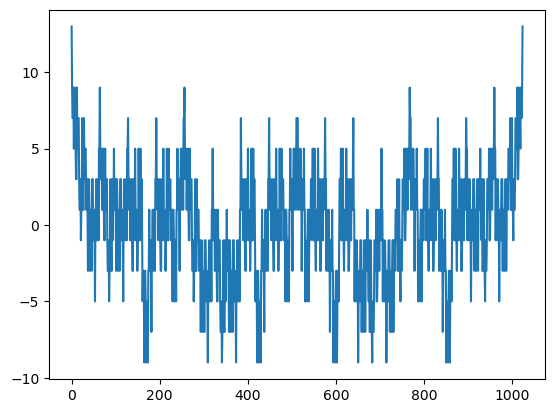

In [6]:
x = [] # Store list of indices, simply a list of values to run through y
y = [] # Store list of energies, possible energies calculated
xmin = None # configuration of minimum energy configuration
emin = 0 # minimum of energy
my_bs = BitString(10)
# Start my code to find lowest energy confirmation-----------------------------------
# Graph and edges already set up earlier in notebook, just testing different variations of bitstrings

for i in range(0, 2**10): #for i in range of every possible bitstring variation (2^10 = 1024)
    x.append(i)  # add the variation i
    my_bs.set_int_config(i) #set the bitstring to the given interger

    y.append(energy(my_bs, G)) # add energy of given variation 

    
    if float(y[i]) <= emin: # if the current y value is smaller than the previous smallest y index
        emin = float(y[i]) #set emin to the current energy configuration
        xmin = i # set xmin to the current i loop

# End my code-------------------------------------------------------------------------

# Print out all the energies
plt.plot(x,y);

# Print out the lowest energy configuration
my_bs.set_int_config(xmin)
print(" Lowest energy %12.8f: %s" %(emin, my_bs))

assert(abs(energy(my_bs, G) - -9) < 1e-12)


### Visualize ground state
Print out the graph again, this time coloring each node according to it's state (0 or 1)

Configuration: 1101011010


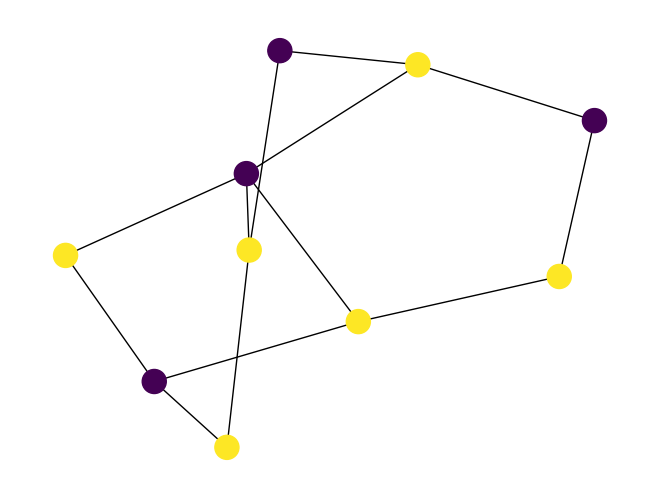

In [7]:
print("Configuration: %s" %my_bs)
nx.draw(G, node_color=my_bs.config)